In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import umap.umap_ as umap
from manuscript_functions.colors import patient_to_id, timepoints_cmap, id_cmap

In [4]:
sns.set_theme(font="Arial", style="ticks", rc={"font.size": 8,"axes.titlesize":8,"axes.labelsize":8, 
                                               "xtick.labelsize": 8, "ytick.labelsize": 8})
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 8

In [6]:
trans_norm_expr = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/Transformed_normalised/myeloid_expr_transformed_normalised.csv",
                             index_col=0)
all_meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/monocytic_meta_TP_patient_file_cluster.csv",
                  index_col=0)

In [ ]:
all_meta["Patient ID"] = [patient_to_id[p] for p in all_meta["patient_id"]]
all_meta["patient_timepoint"] = all_meta["Patient ID"] + "_" + all_meta["time_point"]

In [10]:
Y1 = umap.UMAP(random_state=123).fit_transform(trans_norm_expr)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [35]:
all_meta[["UMAP1", "UMAP2"]] = Y1
all_meta.sort_values("Patient ID", key=lambda idx: [int(x.replace("P", "")) for x in idx])
all_meta

,time_point,patient_id,file_id,cluster_id,Patient ID,patient_timepoint,UMAP1,UMAP2
0,Diagnosis,PAUMTZ,0,20,P1,P1_Diagnosis,10.331334,4.834010
1,Diagnosis,PAUMTZ,0,20,P1,P1_Diagnosis,11.423126,5.287950
2,Diagnosis,PAUMTZ,0,20,P1,P1_Diagnosis,10.830288,5.407061
3,Diagnosis,PAUMTZ,0,20,P1,P1_Diagnosis,11.420115,5.732549
4,Diagnosis,PAUMTZ,0,20,P1,P1_Diagnosis,7.535150,4.393867
...,...,...,...,...,...,...,...,...
350245,EOI I,TEST12378,42,23,P21,P21_EOI I,8.906705,12.430660
350246,EOI I,TEST12378,42,23,P21,P21_EOI I,9.471832,12.224439
350247,EOI I,TEST12378,42,23,P21,P21_EOI I,9.721462,12.246764
350248,EOI I,TEST12378,42,23,P21,P21_EOI I,9.005224,12.428534


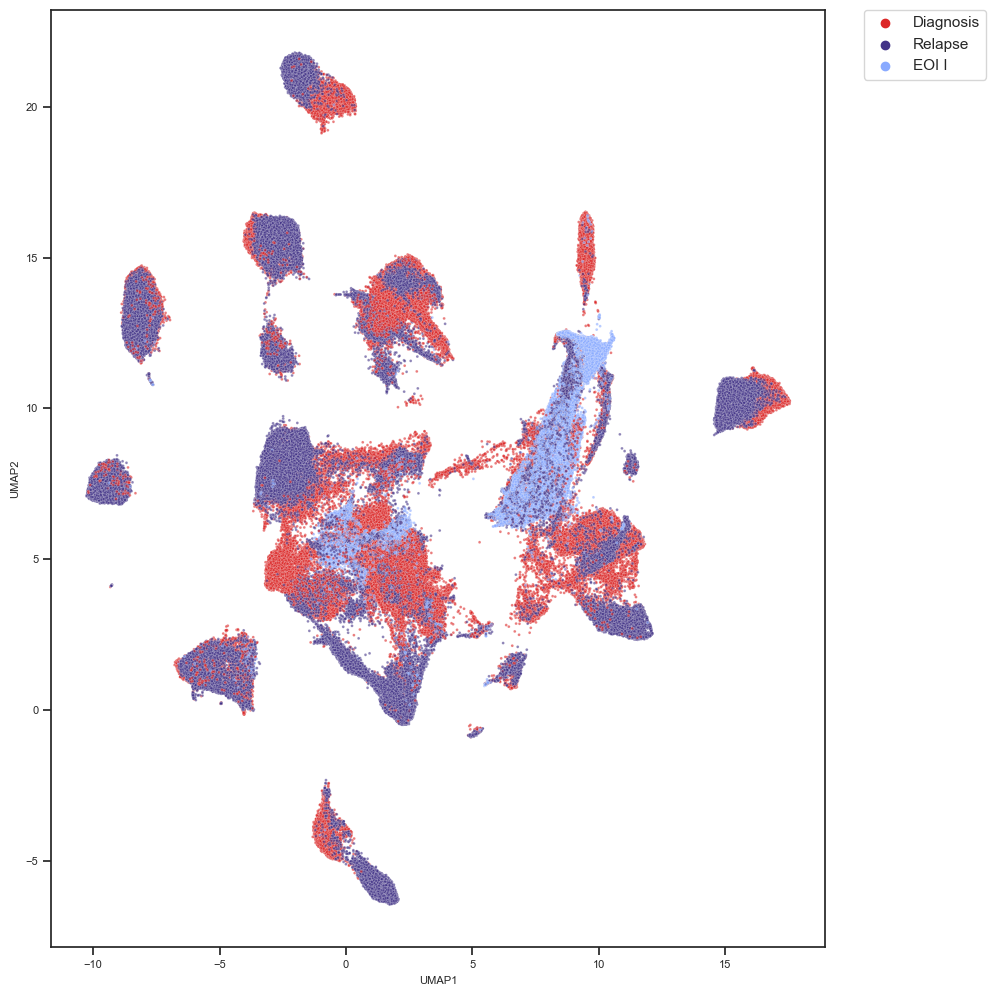

In [40]:
plt.figure(figsize=(10, 10))

sns.scatterplot(data=all_meta, x="UMAP1", y="UMAP2", hue="time_point", alpha=0.6, s=4,palette = timepoints_cmap
               )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("/Users/adr/Downloads/time.png", dpi=300)

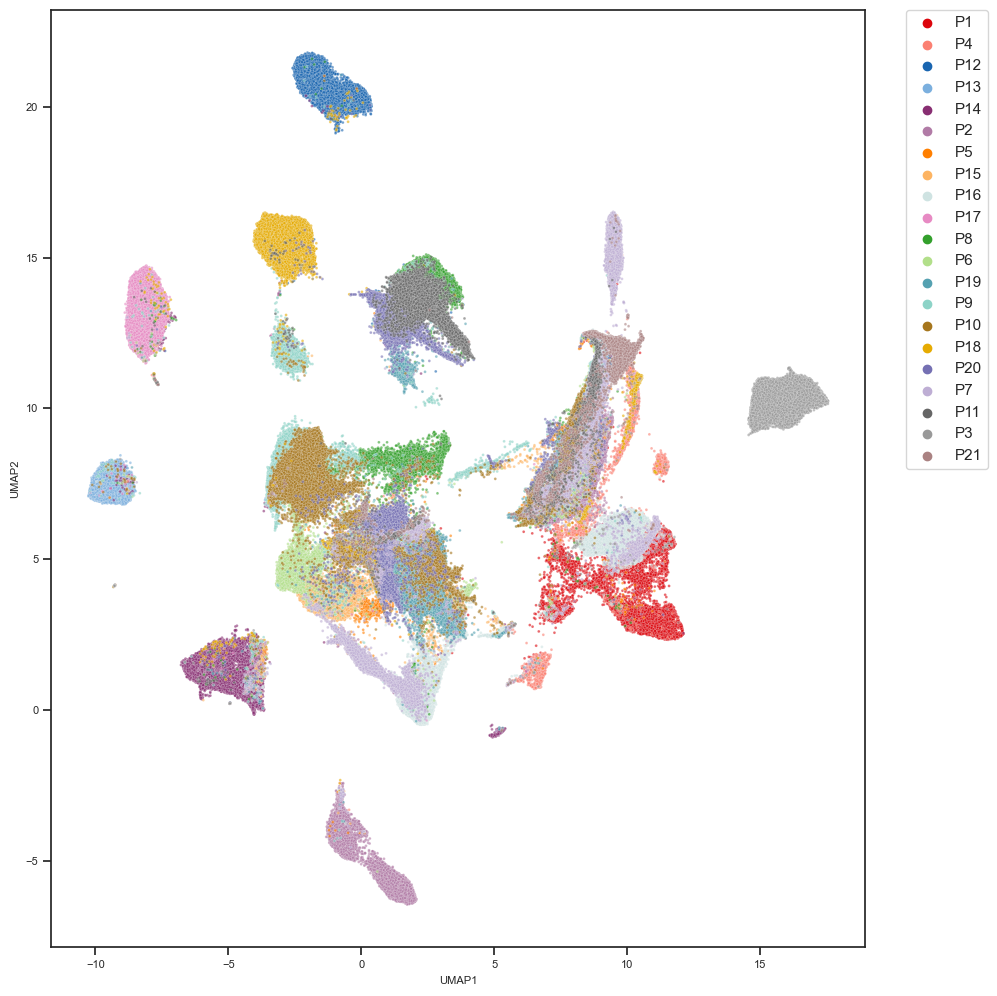

In [39]:

plt.figure(figsize=(10, 10))
sns.scatterplot(data=all_meta, x="UMAP1", y="UMAP2", hue="Patient ID", alpha=0.6, s=4,palette = id_cmap)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("/Users/adr/Downloads/patient.png", dpi=300)